# Read Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")


In [3]:
df_train = pd.read_csv("train.csv")


# EDA

In this part we have exploratory data analysis to understand our dataset clarfy is data corralated with survevi rate or not.

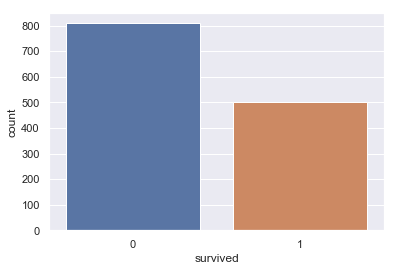

In [4]:
sns_plot=sns.countplot(x='survived', data=df_train).get_figure()
sns_plot.savefig("survive_rate.png")


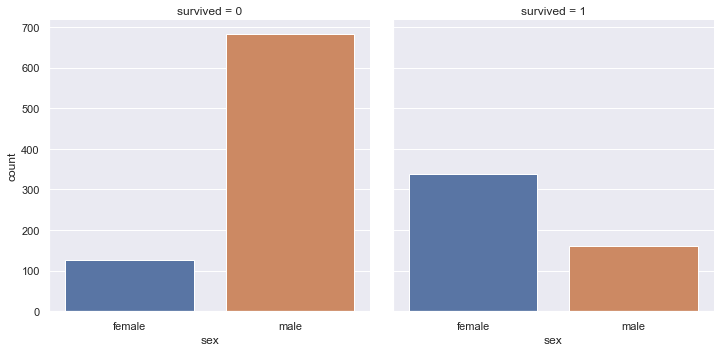

In [5]:
df_train.groupby(['survived','sex'])['survived'].count()
sns_plot=sns.catplot(x='sex', col='survived', kind='count', data=df_train);
sns_plot.savefig("gender_difference.png")

In [7]:
pd.crosstab(df_train.pclass, df_train.survived, margins=True).style.background_gradient(cmap='autumn_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


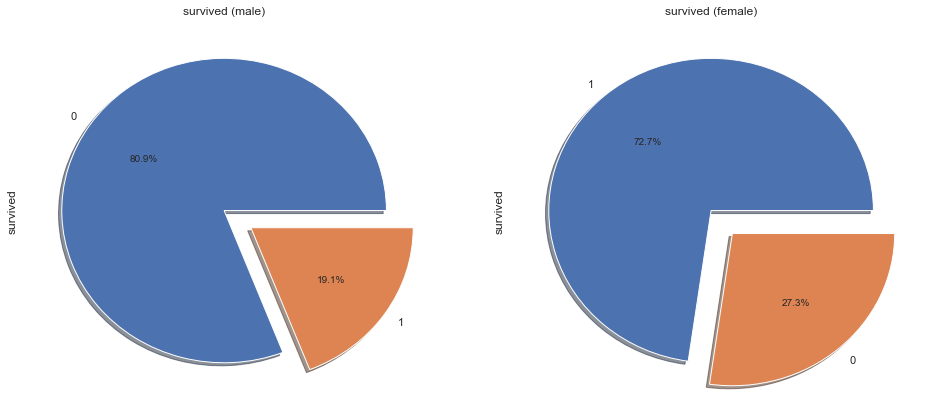

In [8]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df_train['survived'][df_train['sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df_train['survived'][df_train['sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('survived (male)')
ax[1].set_title('survived (female)')

plt.show()

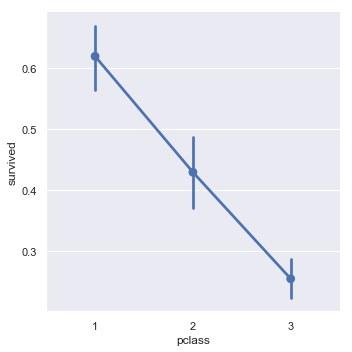

In [9]:

sns_plot=sns.catplot('pclass','survived', kind='point', data=df_train)
sns_plot.savefig("class_difference.png")

In [10]:
pd.crosstab([df_train.sex, df_train.survived], df_train.pclass, margins=True).style.background_gradient(cmap='autumn_r')

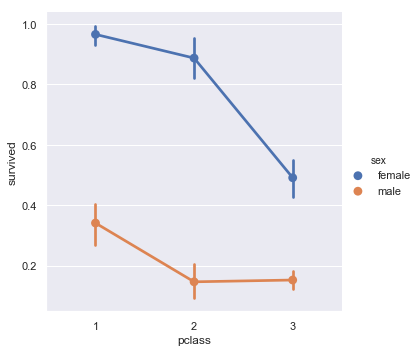

In [11]:
sns.catplot('pclass','survived',hue='sex', kind='point', data=df_train);

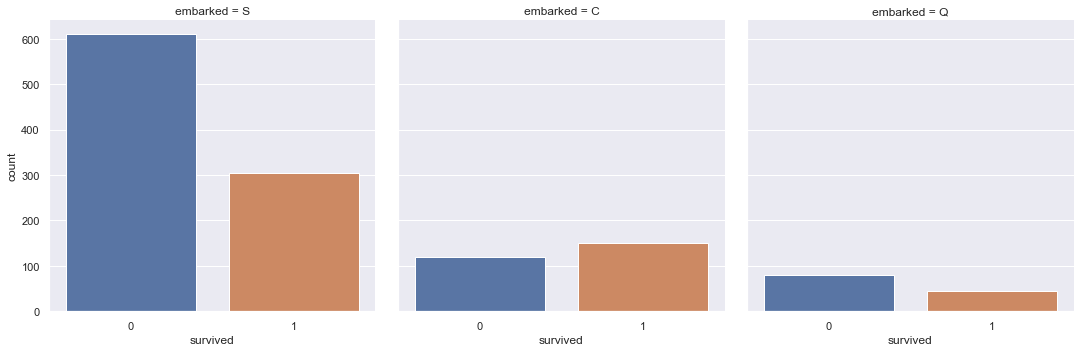

In [12]:
sns.catplot(x='survived', col='embarked', kind='count', data=df_train);

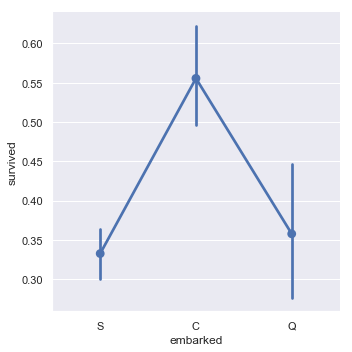

In [13]:
sns.catplot('embarked','survived', kind='point', data=df_train)
plt.show()

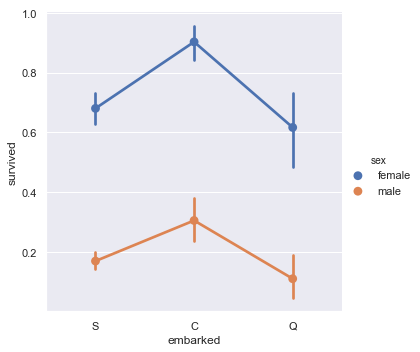

In [14]:
sns.catplot('embarked','survived', hue= 'sex', kind='point', data=df_train)
plt.show()

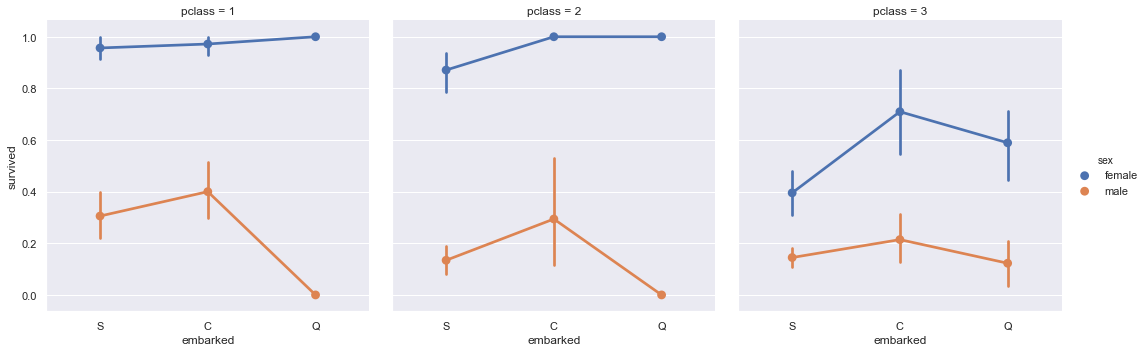

In [15]:
sns.catplot('embarked','survived', col='pclass', hue= 'sex', kind='point', data=df_train)
plt.show()

In [16]:
pd.crosstab([df_train.survived], [df_train.sex, df_train.pclass, df_train.embarked], margins=True)

sex      female                                male                          \
pclass        1          2          3             1           2           3   
embarked      C  Q   S   C  Q   S   C   Q    S    C  Q    S   C  Q    S   C   
survived                                                                      
0             2  0   3   0  0  12   9  23   78   42  1   75  12  5  129  55   
1            69  2  66  11  2  81  22  33   51   28  0   33   5  0   20  15   
All          71  2  69  11  2  93  31  56  129   70  1  108  17  5  149  70   

sex                 All  
pclass                   
embarked   Q    S        
survived                 
0         50  313   809  
1          7   53   498  
All       57  366  1307

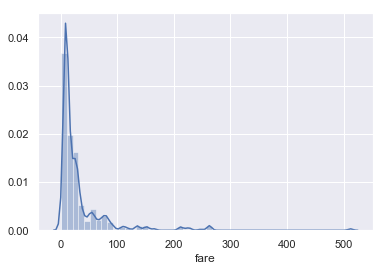

In [17]:
sns.distplot(df_train['fare'].dropna())
plt.show()


In [18]:
for df in [df_train]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['fare'] <= i*50, 'Fare_bin'] = i

In [19]:
df_train

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Fare_bin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",5.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4.0
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1.0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",2.0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1.0


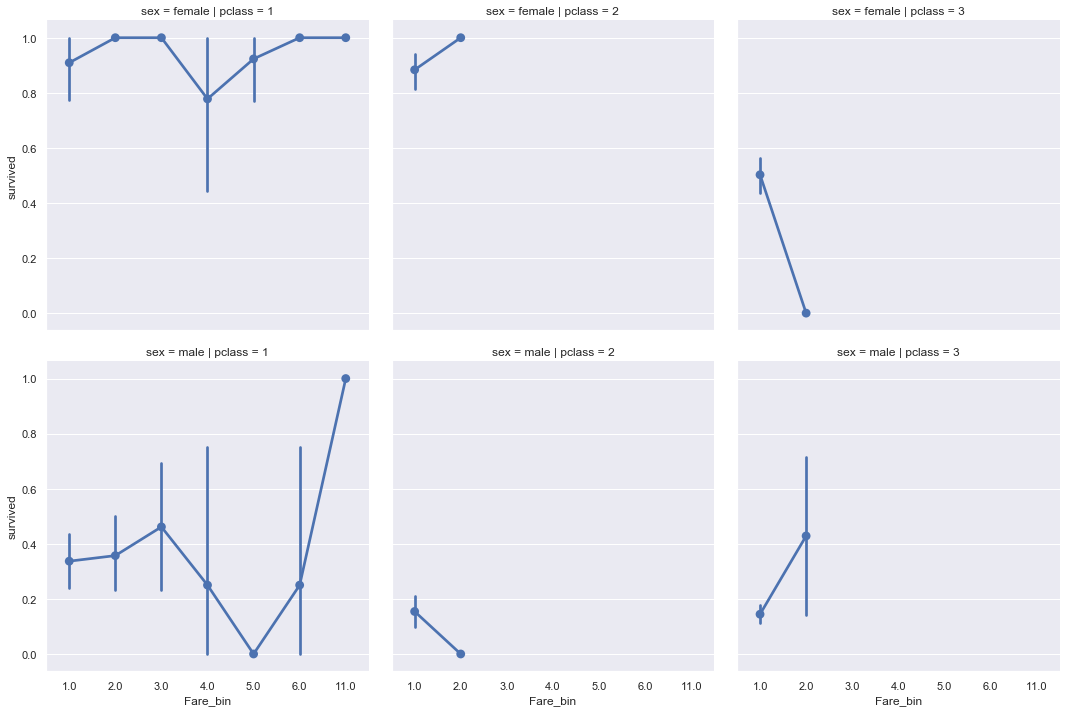

In [20]:
sns.catplot('Fare_bin','survived', col='pclass' , row = 'sex', kind='point', data=df_train)
plt.show()

In [21]:
pd.crosstab([df_train.sex, df_train.survived], [df_train.Fare_bin, df_train.pclass], margins=True).style.background_gradient(cmap='autumn_r')

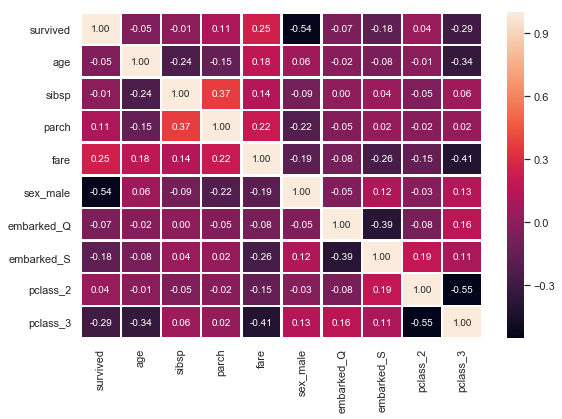

In [57]:
corr = df_train_ml.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

### Result

Dataset have some great correlation and insight to have predictive algorithms

# Data Wrangling

In this part we will prepare our data to be input for ML models:

    *Get rid of categorical data
    *Scale data
    *Use different feature elemination methods

#### Categorical variable

In [23]:
df_train_ml = df_train.copy() # Copied my data for ML process
df_train_ml.drop(['name','ticket', 'cabin',"home.dest","body","boat","Fare_bin"],axis=1,inplace=True);df_train_ml


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S
5,1,1,male,48.0000,0,0,26.5500,S
6,1,1,female,63.0000,1,0,77.9583,S
7,1,0,male,39.0000,0,0,0.0000,S
8,1,1,female,53.0000,2,0,51.4792,S
9,1,0,male,71.0000,0,0,49.5042,C


In [24]:
df_train_ml = pd.get_dummies(df_train_ml, columns=['sex', 'embarked', 'pclass'], drop_first=True) # Transformed categorical data to numerical

df_train_ml.dropna(inplace=True) # Get rid of NA's

In [25]:
df_train_ml.head(10)

,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,pclass_2,pclass_3
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,0,0
5,1,48.0000,0,0,26.5500,1,0,1,0,0
6,1,63.0000,1,0,77.9583,0,0,1,0,0
7,0,39.0000,0,0,0.0000,1,0,1,0,0
8,1,53.0000,2,0,51.4792,0,0,1,0,0
9,0,71.0000,0,0,49.5042,1,0,0,0,0


### Creating base model


In [26]:
from sklearn.model_selection import train_test_split # Split data as test and train test size=0.3
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_train_ml.drop('survived',axis=1), df_train_ml['survived'], test_size=0.30, random_state=101)


In [27]:

rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[168  18]
 [ 42  86]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       186
           1       0.83      0.67      0.74       128

   micro avg       0.81      0.81      0.81       314
   macro avg       0.81      0.79      0.79       314
weighted avg       0.81      0.81      0.80       314

0.8089171974522293


##### Result  

Base model have %78 accuracy. We need to improve that

### First improvement: Scaling data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# for df_train_ml
scaler.fit(X_train)
scaled_features = scaler.transform(X_train)
X_train_sc = pd.DataFrame(scaled_features, columns=X_train.columns)

# for df_test_ml
X_test.fillna(X_test.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(X_test)
X_test_sc = pd.DataFrame(scaled_features, columns=X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [29]:
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train_sc, y_train)
pred_rfc = rfc.predict(X_test_sc)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[164  22]
 [ 41  87]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       186
           1       0.80      0.68      0.73       128

   micro avg       0.80      0.80      0.80       314
   macro avg       0.80      0.78      0.79       314
weighted avg       0.80      0.80      0.80       314

0.7993630573248408


#### Result

As it can be observed accuracy and other metrics increased. So we will contunie with scaled data sets

### Second improvement: Feature elemination

###### Method1: Principal Components Analysis

##### Non-scaled

In [30]:
from sklearn.decomposition import PCA

for i in np.arange(2,10):
    pca = PCA(n_components=i)
    
    principalComponents_train = pca.fit_transform(X_train)
    principalComponents_test = pca.fit_transform(X_test)
    
    principal_train = pd.DataFrame(data = principalComponents_train)
    principal_test = pd.DataFrame(data = principalComponents_test)
    
    rfc = RandomForestClassifier(max_depth=6, max_features=i)
    rfc.fit(principal_train, y_train)
    pred_rfc = rfc.predict(principal_test)
    
    print(i,accuracy_score(y_test, pred_rfc))

2 0.6687898089171974
3 0.6878980891719745
4 0.7452229299363057
5 0.7707006369426752
6 0.7802547770700637
7 0.7929936305732485
8 0.7738853503184714
9 0.7420382165605095


##### Scaled data

In [31]:
from sklearn.decomposition import PCA

for i in np.arange(2,10):
    pca = PCA(n_components=i)
    
    principalComponents_train = pca.fit_transform(X_train_sc)
    principalComponents_test = pca.fit_transform(X_test_sc)
    
    principal_train = pd.DataFrame(data = principalComponents_train)
    principal_test = pd.DataFrame(data = principalComponents_test)
    
    rfc = RandomForestClassifier(max_depth=6, max_features=i)
    rfc.fit(principal_train, y_train)
    pred_rfc = rfc.predict(principal_test)
    
    print(i,accuracy_score(y_test, pred_rfc))

2 0.6464968152866242
3 0.6592356687898089
4 0.6242038216560509
5 0.6942675159235668
6 0.7229299363057324
7 0.7229299363057324
8 0.6687898089171974
9 0.6687898089171974


#### Result

In this point we have some valuable observations. In the first example we used PCA on scaled date and as you see minumum accuracy is 64% and maximum accuracy is 73%. On the other hand when we use PCA on non-scaled data our minumum accuracy is 67% and maximum accuracy is 80%. PCA works on variance of feature. When we scale feature we startize variance of feature. So PCA didn't work well on that example.

###### Method2: Recursive Feature Elimination

##### Non scaled

In [32]:
from sklearn.feature_selection import RFE

In [33]:
for i in np.arange(2,10):
  
  
    rfc=RandomForestClassifier(max_depth=6, max_features=i)
    
    rfe = RFE(rfc,n_features_to_select= i)
    fit = rfe.fit(X_train, y_train)
    

    
    rfc.fit(X_train.iloc[:,fit.support_], y_train)
    pred_rfc = rfc.predict(X_test.iloc[:,fit.support_])
    
    print(i,accuracy_score(y_test, pred_rfc))




2 0.7929936305732485
3 0.802547770700637
4 0.8089171974522293
5 0.8280254777070064
6 0.8375796178343949
7 0.8184713375796179
8 0.8057324840764332
9 0.821656050955414


In [37]:
for i in np.arange(2,10):
  
  
    rfc=RandomForestClassifier(max_depth=6, max_features=i)
    
    rfe = RFE(rfc,n_features_to_select= i)
    fit = rfe.fit(X_train_sc, y_train)
    

    
    rfc.fit(X_train.iloc[:,fit.support_], y_train)
    pred_rfc = rfc.predict(X_test.iloc[:,fit.support_])
    
    print(i,accuracy_score(y_test, pred_rfc))

2 0.7802547770700637
3 0.7834394904458599
4 0.821656050955414
5 0.8121019108280255
6 0.8089171974522293
7 0.7929936305732485
8 0.8312101910828026
9 0.8248407643312102


 #### Result
 
 This time both scaled and non-scaled data have almost same results. The best dataset we have is RFE eleminated 7 feature dataset with scaled data. So when we examine other model we will use this dataset.

# Models

We will try different models to see results on different models

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Decision Tree

In [39]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train_ml,y_train)
pred_dtree = dtree.predict(X_test_ml)
print(classification_report(y_test,pred_dtree))
print(accuracy_score(y_test, pred_dtree))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       186
           1       0.69      0.69      0.69       128

   micro avg       0.75      0.75      0.75       314
   macro avg       0.74      0.74      0.74       314
weighted avg       0.75      0.75      0.75       314

0.7484076433121019


In [43]:
scores_dtree = cross_val_score(dtree, X_train_ml, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.72972973 0.78378378 0.80821918 0.76712329 0.78082192 0.78082192
 0.79452055 0.76712329 0.79452055 0.79166667]
0.7798330865111687


### Random Forest

In [40]:

rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train_ml, y_train)
pred_rfc = rfc.predict(X_test_ml)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[168  18]
 [ 40  88]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       186
           1       0.83      0.69      0.75       128

   micro avg       0.82      0.82      0.82       314
   macro avg       0.82      0.80      0.80       314
weighted avg       0.82      0.82      0.81       314

0.8152866242038217


In [41]:
scores_rfc = cross_val_score(rfc, X_train_ml, y_train, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.72972973 0.78378378 0.80821918 0.76712329 0.78082192 0.78082192
 0.79452055 0.76712329 0.79452055 0.79166667]
0.7798330865111687


### SVM

In [42]:
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_ml, y_train)
pred_svc = svc.predict(X_test_ml)
print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test, pred_svc))
print(accuracy_score(y_test, pred_svc))

[[149  37]
 [ 47  81]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       186
           1       0.69      0.63      0.66       128

   micro avg       0.73      0.73      0.73       314
   macro avg       0.72      0.72      0.72       314
weighted avg       0.73      0.73      0.73       314

0.732484076433121


In [124]:
scores_svc = cross_val_score(svc, X_train_ml, y_train, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.64864865 0.74324324 0.78082192 0.7260274  0.73972603 0.71232877
 0.78082192 0.73972603 0.73972603 0.65277778]
0.7263847751861451


### Comparison

In this part we will compare random forest algorith with XGBoost. We will compare accuracy and overfit differences between random forest and XGBoost with different max_depth and n_estimators parameters

In [127]:
import xgboost as xgb
comparison= pd.DataFrame(index=range(1000), columns= ["max_depth","n_estimators","rfc_accuracy","rfc_kfold","xgb_accuracy","xgb_kfold"])
#comparison = df_.fillna(0) # with 0s rather than NaNs


# This part will run for almost 20 minutes

In [128]:
k=10 # max depth
l=300 #max n_estimator
c=0 # counter
for i in np.arange(1,k):
    for j in np.arange(1,l,5):

        rfc = RandomForestClassifier(max_depth=i, n_estimators=j)
        rfc.fit(X_train_ml, y_train)
        pred_rfc = rfc.predict(X_test_ml)
        
        
        gbm = xgb.XGBClassifier(max_depth=i, n_estimators=j)
        gbm.fit(X_train_ml, y_train)
        pred_gbm=gbm.predict(X_test_ml)
        
        
        
        comparison.loc[c,"max_depth"]=i
        comparison.loc[c,"n_estimators"]=j
        comparison.loc[c,"rfc_accuracy"]=accuracy_score(y_test, pred_rfc)
        comparison.loc[c,"xgb_accuracy"]=accuracy_score(y_test, pred_gbm)
        
        comparison.loc[c,"rfc_kfold"] = cross_val_score(rfc, X_train_ml, y_train, cv=10, scoring='accuracy').mean()
        comparison.loc[c,"xgb_kfold"] = cross_val_score(gbm, X_train_ml, y_train, cv=10, scoring='accuracy').mean()
        
        
        c=c+1

In [240]:
comparison.dropna(inplace=True)

### Visualization of comparison

In [241]:
df_rfc_accuracy=pd.DataFrame(comparison[["max_depth","n_estimators","rfc_accuracy"]])
df_rfc_accuracy["type"]="rfc_accuracy"

df_rfc_accuracy=df_rfc_accuracy.rename(columns = {'rfc_accuracy':'accuracy'})

df_rfc_kfold=pd.DataFrame(comparison[["max_depth","n_estimators","rfc_kfold"]])
df_rfc_kfold["type"]="rfc_kfold"

df_rfc_kfold=df_rfc_kfold.rename(columns = {'rfc_kfold':'accuracy'})

df_xgb_accuracy=pd.DataFrame(comparison[["max_depth","n_estimators","xgb_accuracy"]])
df_xgb_accuracy["type"]="xgb_accuracy"

df_xgb_accuracy=df_xgb_accuracy.rename(columns = {'xgb_accuracy':'accuracy'})

df_xgb_kfold=pd.DataFrame(comparison[["max_depth","n_estimators","xgb_kfold"]])
df_xgb_kfold["type"]="xgb_kfold"

df_xgb_kfold=df_xgb_kfold.rename(columns = {'xgb_kfold':'accuracy'})

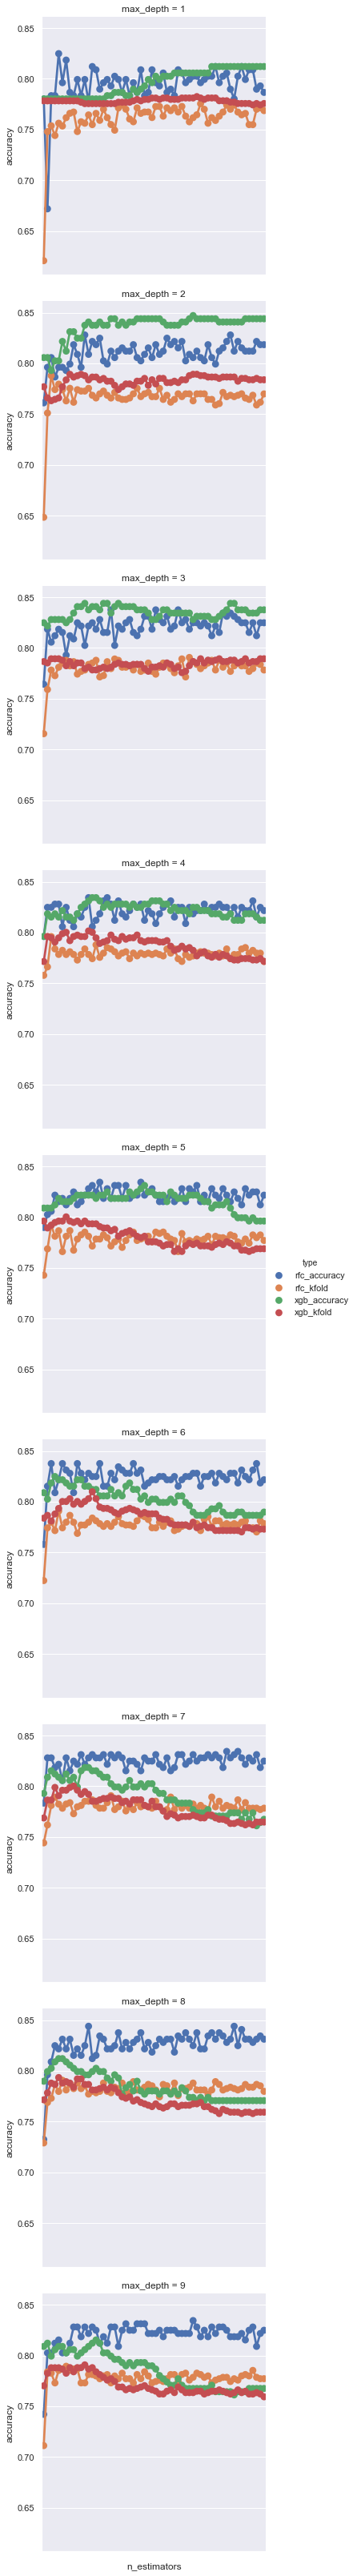

In [243]:
sns.set()

g=sns.catplot('n_estimators','accuracy', row='max_depth' ,  kind='point', hue="type",ci=0, data=df_main,margin_titles=False)
#sns.catplot('n_estimators','xgb_accuracy', col='max_depth' ,  kind='point', hue="type",data=df_main)
g.set_xticklabels(rotation=90,step=2)

plt.show()

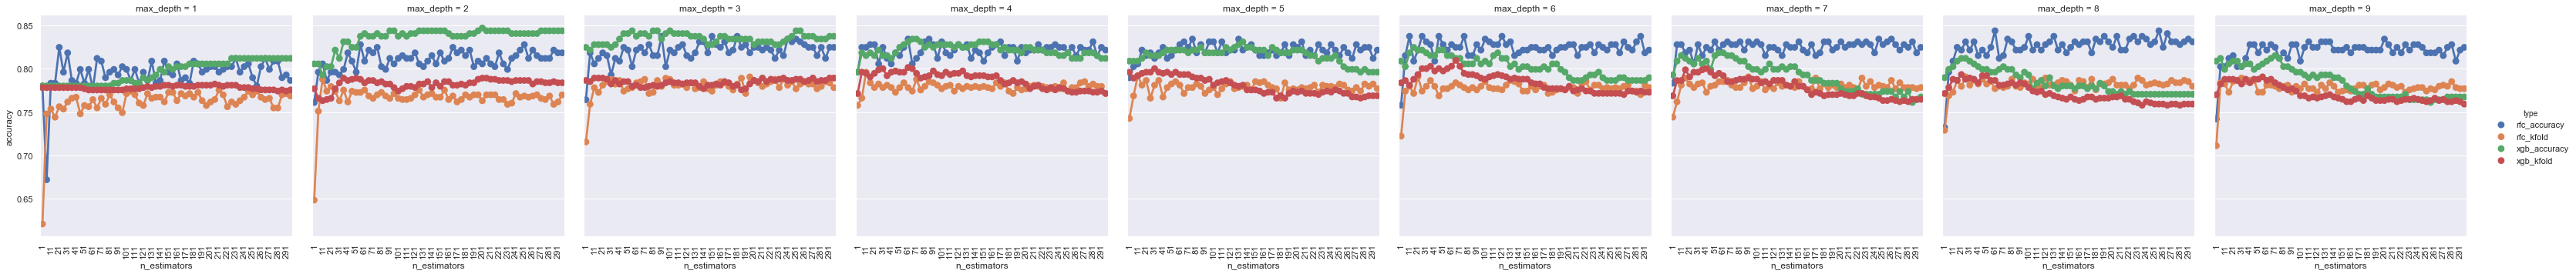

In [242]:
sns.set()

g=sns.catplot('n_estimators','accuracy', col='max_depth' ,  kind='point', hue="type",ci=0, data=df_main,margin_titles=False)
#sns.catplot('n_estimators','xgb_accuracy', col='max_depth' ,  kind='point', hue="type",data=df_main)
g.set_xticklabels(rotation=90,step=2)

plt.show()

Öncelikle yukarıdaki iki grafik aynı grafikler. Hangisini raporda kullanmak daha kolay olacaksa kullanabilirisn. Birisi soldan saga birisi yukarıdan aşağıya akıyor. 

Observations:
    
    Highest accuracy belongs to XGBoost with max_depth=2 and n_estimators=2**
    When number of depth increasing accuracy of XGBoost is deacreasing. Because XGBoost is designed to work with short decision     tree.
    Especially after max_depth=5 n_estimators have directly negative corrolation with XGBoost accuracy. This also show us        XGBoost work better with lower max_depth
    At the same point we also can also observe ovetfitting. Becasue xgb_kfold is decreasing too.
    
    
    For Random forest n_estimators change almost nothing. Just we can observe a increase in accuracy until we reach 20 as n_estimator. After that there aren't any affect on accuracy.
    
    
    Before max_depth lower than 5, xgboost is better model. 

# Voting Classifier

We will try to ensemble two different model with Voting Classifier method

In [45]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc)], voting='hard')
eclf1 = eclf1.fit(X_train_ml, y_train)

pred_eclf1 = eclf1.predict(X_test_ml)
print(confusion_matrix(y_test, pred_eclf1))
print(classification_report(y_test, pred_eclf1))
print(accuracy_score(y_test, pred_eclf1))

[[174  12]
 [ 65  63]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       186
           1       0.84      0.49      0.62       128

   micro avg       0.75      0.75      0.75       314
   macro avg       0.78      0.71      0.72       314
weighted avg       0.77      0.75      0.74       314

0.7547770700636943
